In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time
from google.colab.patches import cv2_imshow
from IPython.display import clear_output



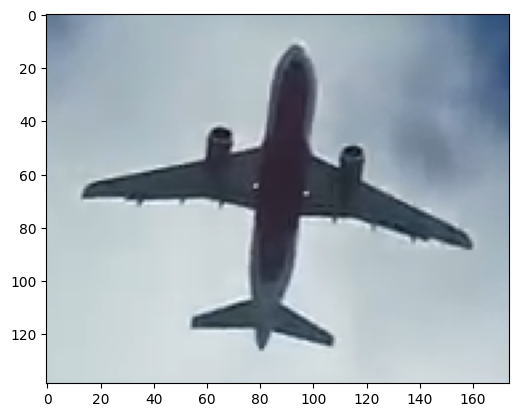

In [2]:
# this is target image
image = cv2.imread("helicopter_roi.png")
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
rgb_image =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

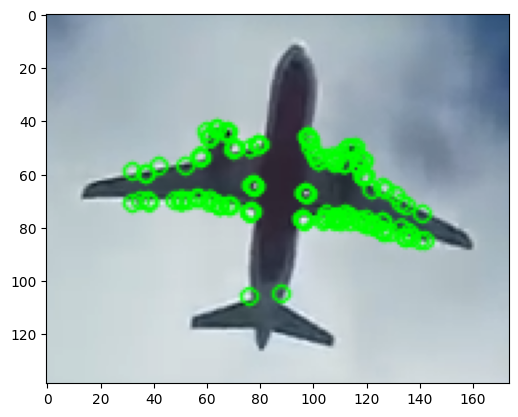

In [3]:
# Initiate ORB
orb = cv2.ORB_create()

# find the keypoints with ORB
keypoints_1, descriptors_1 = orb.detectAndCompute(gray_image, None)

# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(rgb_image,keypoints_1,None,color=(0,255,0), flags=0)

plt.imshow(img2)

In [4]:
# path to video
video_path="helicopter_2.mp4"
video = cv2.VideoCapture(video_path)

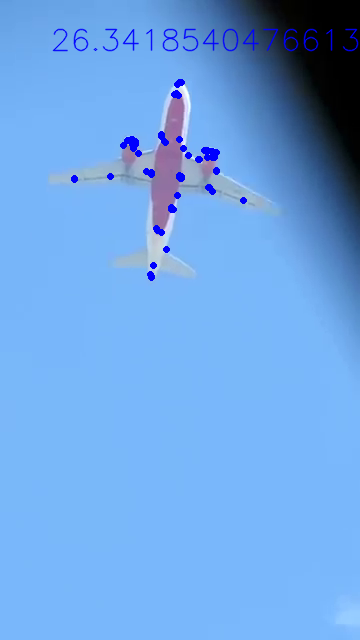

In [5]:
from google.colab.patches import cv2_imshow

# Initialize variables for FPS calculation
t0 = time.time()
n_frames = 1

# Initiate
orb = cv2.ORB_create()

# matcher object
bf = cv2.BFMatcher()

while True:
    # reading video
    ret, frame = video.read()

    if ret:
        # convert frame to gray scale
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # compute the descriptors with BRIEF
        keypoints_2, descriptors_2 = orb.detectAndCompute(frame_gray, None)

        # Compare keypoints/descriptors
        matches = bf.match(descriptors_1, descriptors_2)

        for match in matches:
            # queryIdx gives keypoint index from target image
            query_idx = match.queryIdx

            # trainIdx gives keypoint index from current frame
            train_idx = match.trainIdx

            # take coordinates that matches
            pt1 = keypoints_1[query_idx].pt

            # current frame keypoints coordinates
            pt2 = keypoints_2[train_idx].pt

            # draw circle to pt2 coordinates
            cv2.circle(frame, (int(pt2[0]), int(pt2[1])), 2, (255,0,0), 2)

        # Calculate and display FPS
        elapsed_time = time.time() - t0
        avg_fps = (n_frames / elapsed_time)
        print("Average FPS: " + str(avg_fps))
        cv2.putText(frame, str(avg_fps), (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 1, cv2.LINE_AA)
        n_frames += 1

        # Clear previous output and show new frame
        clear_output(wait=True)
        cv2_imshow(frame)

        # Check for 'q' key to quit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Clean up
cv2.destroyAllWindows()